In [193]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [194]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix

In [240]:
df3 = pd.read_csv("goodbad.csv")

In [241]:
df3.drop(df3.columns[0],axis=1,inplace=True)

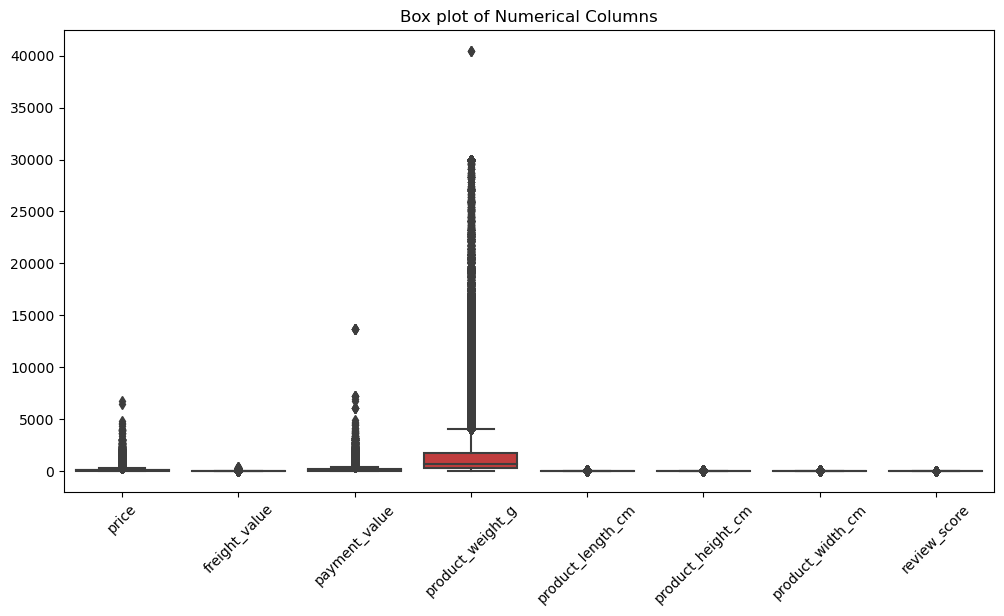

In [242]:
numerical_columns = df3.select_dtypes(include=['float64', 'int64']).columns

# Create box plots for each numerical column
plt.figure(figsize=(12, 6))
sns.boxplot(data=df3[numerical_columns])
plt.xticks(rotation=45)
plt.title('Box plot of Numerical Columns')
plt.show()

In [249]:
# Calculate the first quartile (Q1) and third quartile (Q3) for each numerical column
Q1 = df3[numerical_columns].quantile(0.25)
Q3 = df3[numerical_columns].quantile(0.75)

# Calculate the interquartile range (IQR) for each numerical column
IQR = Q3 - Q1

# Define a threshold for outliers
threshold = 1.5

# Identify outliers
outliers = ((df3[numerical_columns] < (Q1 - threshold * IQR)) | (df3[numerical_columns] > (Q3 + threshold * IQR))).any(axis=1)

# Remove outliers from the DataFrame
df3_clean = df3[~outliers]

# Now df_clean contains the DataFrame with outliers removed

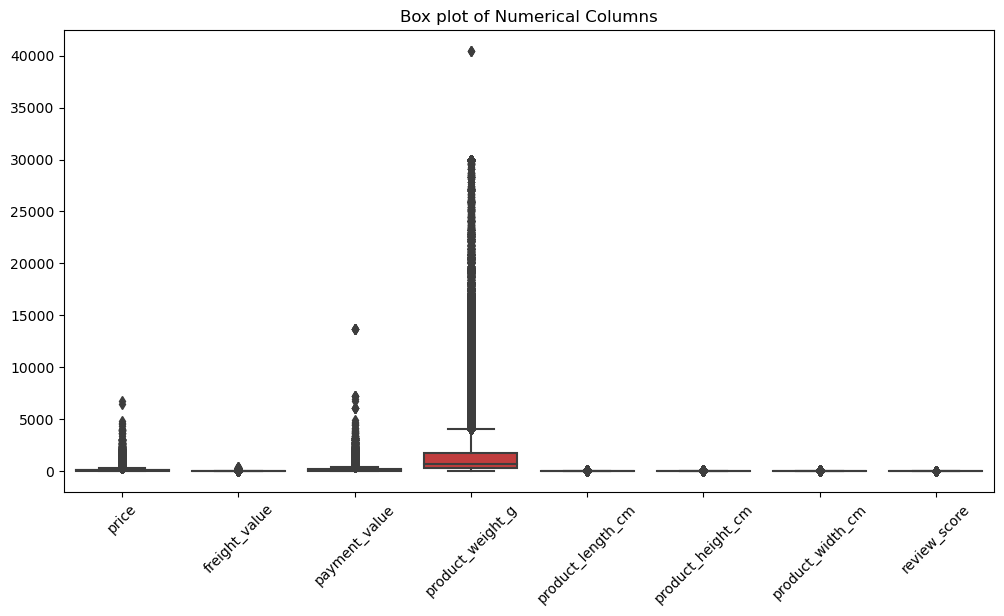

In [250]:
numerical_columns = df3.select_dtypes(include=['float64', 'int64']).columns

# Create box plots for each numerical column
plt.figure(figsize=(12, 6))
sns.boxplot(data=df3[numerical_columns])
plt.xticks(rotation=45)
plt.title('Box plot of Numerical Columns')
plt.show()

In [251]:
for label, content in df3.items():
    if pd.api.types.is_string_dtype(content):
        df3[label] = content.astype("category").cat.as_ordered()

In [252]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112788 entries, 0 to 112787
Data columns (total 9 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   price                          112788 non-null  float64
 1   freight_value                  112788 non-null  float64
 2   payment_value                  112788 non-null  float64
 3   product_weight_g               112788 non-null  float64
 4   product_length_cm              112788 non-null  float64
 5   product_height_cm              112788 non-null  float64
 6   product_width_cm               112788 non-null  float64
 7   product_category_name_english  112788 non-null  int8   
 8   review_score                   112788 non-null  float64
dtypes: float64(8), int8(1)
memory usage: 7.0 MB


In [253]:
for label, content in df3.items():
    if not pd.api.types.is_numeric_dtype(content):
        
        # Turn categories into numbers and add +1
        df3[label] = pd.Categorical(content).codes+1

In [264]:
df3_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69861 entries, 0 to 112787
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   price                          69861 non-null  float64
 1   freight_value                  69861 non-null  float64
 2   payment_value                  69861 non-null  float64
 3   product_weight_g               69861 non-null  float64
 4   product_length_cm              69861 non-null  float64
 5   product_height_cm              69861 non-null  float64
 6   product_width_cm               69861 non-null  float64
 7   product_category_name_english  69861 non-null  int8   
 8   review_score                   69861 non-null  float64
dtypes: float64(8), int8(1)
memory usage: 4.9 MB


In [255]:
X = df3_clean.drop(['review_score'],axis=1)
y = df3_clean['review_score']

In [256]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [257]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()

X_train = ms.fit_transform(X_train)
X_test = ms.transform(X_test)

In [258]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [259]:
X_train

array([[ 0.41259658,  1.69595438,  0.26598357, ...,  0.53198748,
        -0.17373011,  0.94487652],
       [-0.89244821, -1.11591648, -0.96558546, ...,  2.21532281,
         1.10097492,  0.45956881],
       [-0.97200102, -0.24457626, -0.96321049, ...,  1.56788614,
        -1.10078831,  0.45956881],
       ...,
       [ 0.29894972, -0.33650665,  0.02596343, ...,  0.79096214,
        -0.52137693,  0.19485551],
       [ 0.31959557, -0.18861863,  0.05312712, ..., -0.37442386,
        -0.28961238,  0.19485551],
       [-0.72197792,  1.52008754, -0.63620717, ..., -0.37442386,
         1.79626857,  0.19485551]])

In [260]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# create instances of all models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    
}
for name, md in models.items():
    md.fit(X_train,y_train)
    ypred = md.predict(X_test)
    
    print(f"{name}  with accuracy : {accuracy_score(y_test,ypred)}")

Logistic Regression  with accuracy : 0.6801688971588062
Naive Bayes  with accuracy : 0.6801688971588062
K-Nearest Neighbors  with accuracy : 0.6129678665998711
Decision Tree  with accuracy : 0.5834824304014886
Random Forest  with accuracy : 0.6732269376654978


In [261]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
ypred = rfc.predict(X_test)
accuracy_score(y_test,ypred) 

0.6745867029270737

In [263]:
df3_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69861 entries, 0 to 112787
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   price                          69861 non-null  float64
 1   freight_value                  69861 non-null  float64
 2   payment_value                  69861 non-null  float64
 3   product_weight_g               69861 non-null  float64
 4   product_length_cm              69861 non-null  float64
 5   product_height_cm              69861 non-null  float64
 6   product_width_cm               69861 non-null  float64
 7   product_category_name_english  69861 non-null  int8   
 8   review_score                   69861 non-null  float64
dtypes: float64(8), int8(1)
memory usage: 4.9 MB


In [267]:
a = pd.read_csv("goodbad.csv")
a.head()

,Unnamed: 0,price,freight_value,payment_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,review_score
0,0,58.9,13.29,72.19,650.0,28.0,9.0,14.0,cool_stuff,5.0
1,1,55.9,17.96,73.86,650.0,28.0,9.0,14.0,cool_stuff,5.0
2,2,64.9,18.33,83.23,650.0,28.0,9.0,14.0,cool_stuff,4.0
3,3,58.9,16.17,75.07,650.0,28.0,9.0,14.0,cool_stuff,5.0
4,4,58.9,13.29,72.19,650.0,28.0,9.0,14.0,cool_stuff,5.0


In [268]:
# Assuming 'column_name' is the name of your column with 71 unique categories

# Convert the column to categorical data
a['product_category_name_english'] = pd.Categorical(df['product_category_name_english'])

# Encode the categories into numbers from 1 to 71
a['encoded_column'] = a['product_category_name_english'].cat.codes + 1

In [273]:
a.head()

,product_category_name_english,encoded_column
0,cool_stuff,21
1,cool_stuff,21
2,cool_stuff,21
3,cool_stuff,21
4,cool_stuff,21


In [276]:
def recommendation(price,freight_value,payment_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english):
    features = np.array([[price,freight_value,payment_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english]])
    transformed_features = ms.fit_transform(features)
    transformed_features = sc.fit_transform(transformed_features)
    prediction = rfc.predict(transformed_features).reshape(1,-1)
    
    return prediction[0] 

In [278]:
price = 50
freight_value = 25
payment_value = 75
product_weight_g = 600
product_length_cm = 40
product_height_cm = 30
product_width_cm = 25
product_category_name_english1 = 'perfumery'
filtered_df = a[a['product_category_name_english'] == product_category_name_english1]
encoded_values = filtered_df['encoded_column'].values
product_category_name_english = encoded_values[0]

predict = recommendation(price,freight_value,payment_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english)


crop_dict = {1: "Worse", 2: "Bad", 3: "Average", 4: "Good", 5: "Excellent"}

if predict[0] in crop_dict:
    crop = crop_dict[predict[0]]
    print("The product which you selected may comes under '{}' category".format(crop))
else:
    print("Sorry are not able to recommend a proper crop for this environment")

The product which you selected may comes under 'Excellent' category


In [279]:
import pickle
pickle.dump(rfc,open('model.pkl','wb'))
pickle.dump(ms,open('minmaxscaler.pkl','wb'))
pickle.dump(sc,open('standscaler.pkl','wb'))